# SVM Classifier - Padmaja 19BAI1107

## Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

#### Reading the csv file drug200.csv ( dataset taken from kaggle : Drug classification )

In [63]:
df1 = pd.read_csv('drug200.csv')

In [64]:
df1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


#### Inference : Here we can see that attributes Sex BP and Cholestrol are of object datatype. We need to convert them to integers so that we can use the attributes in the model.

### Data preprocessing

In [66]:
def data_encoding(df1):
    df1.Sex = LabelEncoder().fit_transform(df1.Sex)
    df1.BP = LabelEncoder().fit_transform(df1.BP)
    df1.Cholesterol = LabelEncoder().fit_transform(df1.Cholesterol)

In [67]:
data_encoding(df1)
print(df1)

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    0   0            0   25.355  DrugY
1     47    1   1            0   13.093  drugC
2     47    1   1            0   10.114  drugC
3     28    0   2            0    7.798  drugX
4     61    0   1            0   18.043  DrugY
..   ...  ...  ..          ...      ...    ...
195   56    0   1            0   11.567  drugC
196   16    1   1            0   12.006  drugC
197   52    1   2            0    9.894  drugX
198   23    1   2            1   14.020  drugX
199   40    0   1            1   11.349  drugX

[200 rows x 6 columns]


In [68]:
X=df1.iloc[:, :-1]
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


#### Checking for presence null values

In [24]:
df1.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Thus there are no null values present in the dataset. 

#### Converting string value to int type for labels

In [78]:
from sklearn.preprocessing import LabelEncoder
y=df1.iloc[:,-1]
drug_encoder = LabelEncoder()
y = drug_encoder.fit_transform(y)
y

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

#### Data Standardisation

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Exploratory data analysis

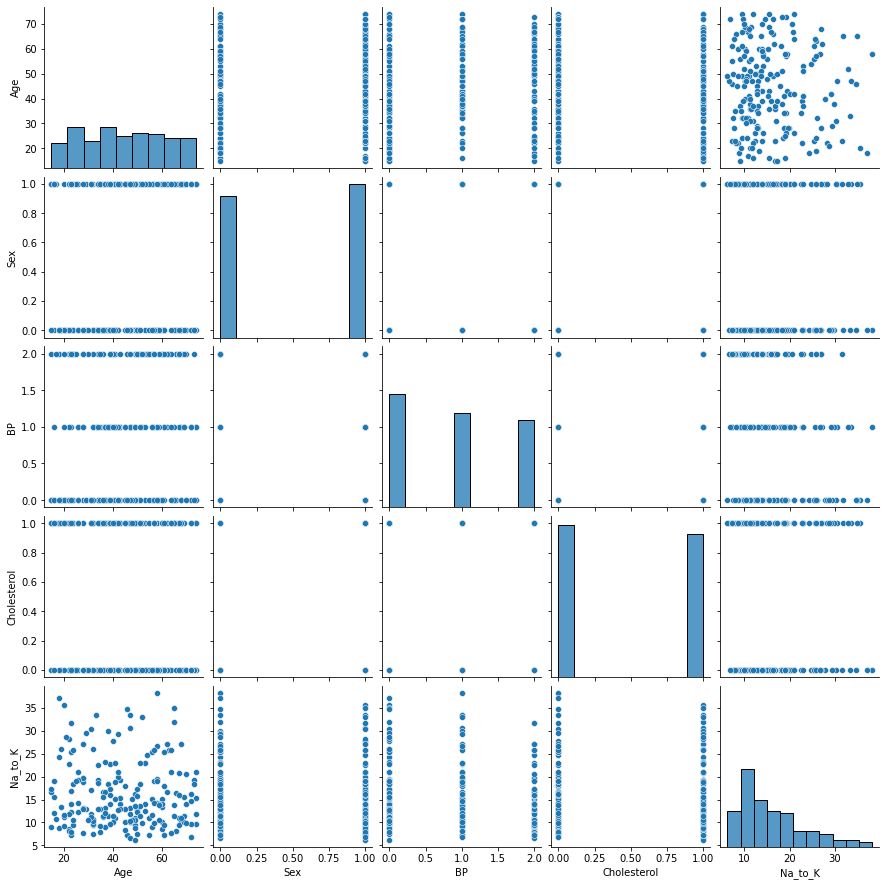

In [61]:
sns.pairplot(df1)

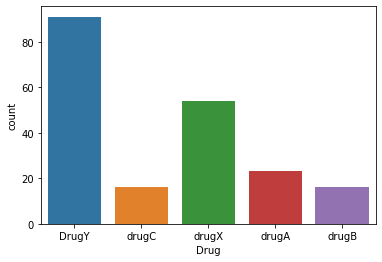

In [69]:
sns.countplot(x='Drug', data=df1)

#### Inference : From this count plot we can infer that Drug Y has been used most by people

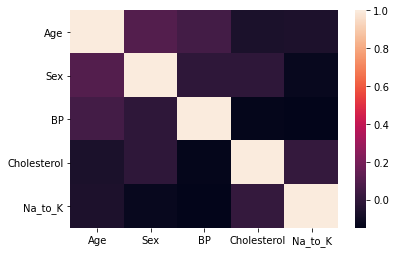

In [80]:
sns.heatmap(df1.corr())

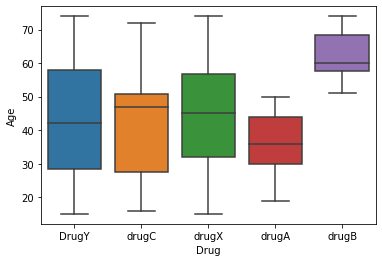

In [85]:
sns.boxplot(x="Drug", y="Age", data=df1)

#### Inference : From this boxplot we can see that Drug Y which has been used most is popular among the age group 40-45. Likewise Drug C is common in the age group of 47, Drug X  in the age group of 46, Drug A in the age group of 37 and Drug B in the age group of 60.

### Splitting dataset into training set and testing set for better generalisation

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [9]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [10]:
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
print(confusion_matrix(y_test,predictions))

[[14  0  1  0  3]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  5  0]
 [ 1  0  0  0  9]]


### Classification report

In [12]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       1.00      1.00      1.00         3
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         5
           4       0.75      0.90      0.82        10

    accuracy                           0.88        40
   macro avg       0.90      0.94      0.91        40
weighted avg       0.89      0.88      0.88        40



### Accuracy

In [81]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)

0.875

#### Inference : Without using Grid search accuracy for our model is about 87.5%

## Gridsearch using rbf kernel

In [13]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [16]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.438, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.469, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.469, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.469, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.438, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.531, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.469, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.469, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.438, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.438, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.469, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.469, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.469, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] 

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.1s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [17]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [18]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [19]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[15  0  0  0  3]
 [ 0  3  0  0  0]
 [ 1  0  3  0  0]
 [ 0  0  0  5  0]
 [ 1  0  0  0  9]]


### Classification report

In [20]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       1.00      1.00      1.00         3
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         5
           4       0.75      0.90      0.82        10

    accuracy                           0.88        40
   macro avg       0.93      0.90      0.91        40
weighted avg       0.88      0.88      0.88        40



### Accuracy

In [82]:
metrics.accuracy_score(y_test,grid_predictions)

0.875

#### Inference : After rbf Grid Search the accuracy remains to be 87.5%

## Gridsearch using linear kernel

In [34]:
param_grid1 = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear']} 

In [41]:
grid1 = GridSearchCV(SVC(),param_grid1,refit=True,verbose=3)

In [42]:
grid1.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.781, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.906, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.844, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.906, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.875, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.781, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.969, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.938, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.938, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.969, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.969, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [43]:
grid1.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [44]:
grid1.best_estimator_

SVC(C=10, gamma=1, kernel='linear')

In [45]:
grid1_predictions = grid1.predict(X_test)
print(confusion_matrix(y_test,grid1_predictions))

[[15  0  0  0  3]
 [ 0  3  0  0  0]
 [ 1  0  3  0  0]
 [ 0  0  0  5  0]
 [ 1  0  0  0  9]]


### Classification report

In [46]:
print(classification_report(y_test,grid1_predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       1.00      1.00      1.00         3
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         5
           4       0.75      0.90      0.82        10

    accuracy                           0.88        40
   macro avg       0.93      0.90      0.91        40
weighted avg       0.88      0.88      0.88        40



### Accuracy

In [83]:
metrics.accuracy_score(y_test,grid1_predictions)

0.875

#### Inference : After linear kernel Grid Search the accuracy remains to be 87.5%

## Gridsearch using poly kernel

In [47]:
param_grid2 = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['poly']} 
grid2 = GridSearchCV(SVC(),param_grid2,refit=True,verbose=3)
grid2.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.938, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.969, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.875, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.938, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.844, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.438, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] .... C=0.1, gamma=0.0001, kernel=poly, score=0.438, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.906, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.875, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.938, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.844, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.562, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] 

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly']},
             verbose=3)

In [49]:
grid2.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [50]:
grid2.best_estimator_

SVC(C=0.1, gamma=1, kernel='poly')

In [51]:
grid2_predictions = grid2.predict(X_test)
print(confusion_matrix(y_test,grid2_predictions))

[[13  0  1  0  4]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  5  0]
 [ 1  0  0  0  9]]


### Classification report

In [52]:
print(classification_report(y_test,grid2_predictions))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        18
           1       1.00      1.00      1.00         3
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         5
           4       0.69      0.90      0.78        10

    accuracy                           0.85        40
   macro avg       0.88      0.92      0.90        40
weighted avg       0.87      0.85      0.85        40



### Accuracy

In [57]:
metrics.accuracy_score(y_test,grid2_predictions)

0.85

#### Inference : After poly kernel Grid Search the accuracy has reduced to be 85%. Thus polymomial kernel may not be a suitable model for this dataset.